In [4]:
%matplotlib inline
from matplotlib.pyplot import figure

/Users/roberto/miniconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


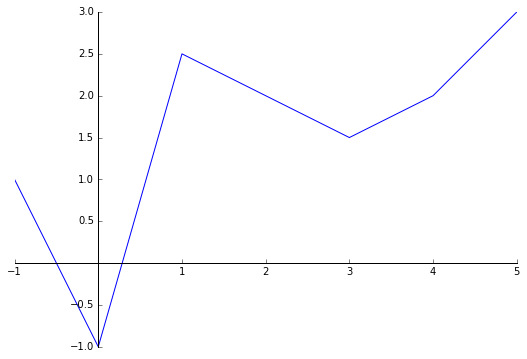

In [4]:
fig = figure(figsize=(9,6))
ax = fig.gca()

#ax.axes.get_xaxis().set_visible(False)
#ax.axes.get_yaxis().set_visible(False)

ax.axes.spines["top"].set_color("none")
ax.axes.spines["right"].set_color("none")
ax.tick_params(top="off", right="off")

ax.axes.spines["left"].set_position("zero")
ax.axes.spines["bottom"].set_position("zero")

ax.plot([-1, 0, 1, 2, 3, 4, 5], [1, -1, 2.5, 2, 1.5, 2, 3])
fig.canvas.draw()

labels = ax.xaxis.get_ticklabels()
#ticklabels[0].set_visible(False)
for label in labels:
    if label.get_text() == '0' or label.get_text() == '0.0':
        label.set_visible(False)
        
labels = ax.yaxis.get_ticklabels()
#ticklabels[0].set_visible(False)
for label in labels:
    if label.get_text() == '0' or label.get_text() == '0.0':
        label.set_visible(False)

In [5]:
ticklabels[2].get_text() == '1'

NameError: name 'ticklabels' is not defined

In [6]:
float('0.0')

0.0

In [53]:
def graficar(xs, ys, tam=(9, 6), tls=True):
    #%matplotlib notebook
    from matplotlib.pyplot import figure
    from matplotlib import rc
    #rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    ## for Palatino and other serif fonts use:
    rc('font',**{'family':'serif','serif':['Palatino'], 'size':14.0})
    #rc('font', **{'family':'cursive', 'cursive':['Zapf Chancery'], 'size':14.0})
    #rc('font', **{'family':'fantasy', 'fantasy':['Humor Sans'], 'size':14.0})
    rc('text', usetex=True)
    
    fig = figure(figsize=tam)
    ax = fig.gca()

    #ax.axes.get_xaxis().set_visible(False)
    #ax.axes.get_yaxis().set_visible(False)

    ax.axes.spines["top"].set_color("none")
    ax.axes.spines["right"].set_color("none")
    ax.tick_params(top="off", right="off")

    ax.axes.spines["left"].set_position("zero")
    ax.axes.spines["bottom"].set_position("zero")
    ax.spines["left"].set_linewidth(2)
    ax.spines["bottom"].set_linewidth(2)

    ax.plot(xs, ys, 'k')
    ax.axes.set_xlim(-0.1, max(xs) + 0.1)
    ax.axes.set_ylim(min(ys)-0.1, max(ys)+0.1)
    fig.canvas.draw()
    
    if tls == False:
        ax.axes.get_xaxis().set_ticks([])
        ax.axes.get_yaxis().set_ticks([])

    labels = ax.xaxis.get_ticklabels()
    #ticklabels[0].set_visible(False)
    for label in labels:
        if label.get_text() == r'$0$' or label.get_text() == r'$0.0$':
            label.set_visible(False)

    labels = ax.yaxis.get_ticklabels()
    #ticklabels[0].set_visible(False)
    for label in labels:
        if label.get_text() == r'$0$' or label.get_text() == r'$0.0$':
            label.set_visible(False)
            
    return ax

<IPython.core.display.Javascript object>


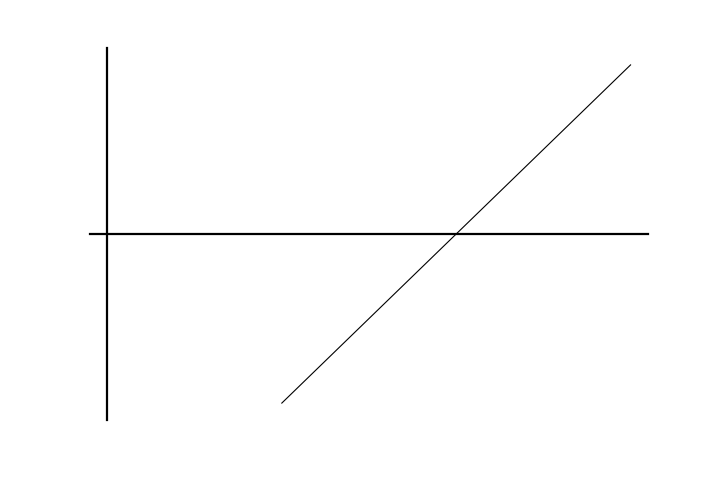

In [154]:
graficar([1, 2, 3], [-1,0,1], tls = False);

In [69]:
from scipy.integrate import odeint

In [89]:
from numpy import sin, linspace, exp

In [155]:
f = lambda x, t: -x

t0, tf = 0, 5
n = 10

ts1 = linspace(t0, tf, n)
ys1 = exp(-ts1)
#ts2 = linspace(t0, tf, n)
#ys2 = odeint(f, 1, ts2)

Δt = (tf - t0)/n
ys2 = []
for t in ts2:
    if ys2 == []:
        ys2.append(1)
    else:
        ys2.append(ys2[-1] + f(ys2[-1], t)*Δt)


<IPython.core.display.Javascript object>


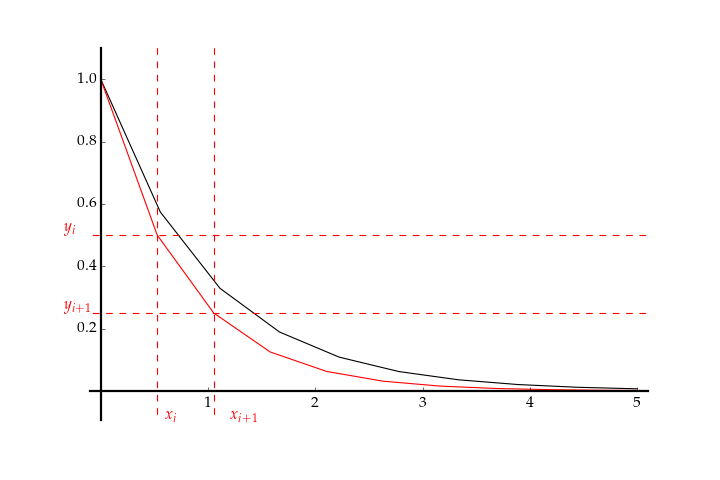

In [181]:
ax2 = graficar(ts1, ys1)

ax2.plot(ts2, ys2, 'r')
ax2.plot([-1000, 1000], [ys2[1], ys2[1]], "--r")
ax2.plot([-1000, 1000], [ys2[2], ys2[2]], "--r")
ax2.text(-0.35, 0.0 + ys2[1], r'$y_{i}$', color='red')
ax2.text(-0.35, 0.0 + ys2[2], r'$y_{i+1}$', color='red');


ax2.plot([ts2[1], ts2[1]], [-1000, 1000], "--r")
ax2.plot([ts2[2], ts2[2]], [-1000, 1000], "--r")
ax2.text(0.6, -0.1 , r'$x_{i}$', color='red')
ax2.text(1.2, -0.1 , r'$x_{i+1}$', color='red');

In [50]:
from control import tf, step
from

In [66]:
G = tf([1],[1, 1, 1])
t, y = step(G)

<IPython.core.display.Javascript object>


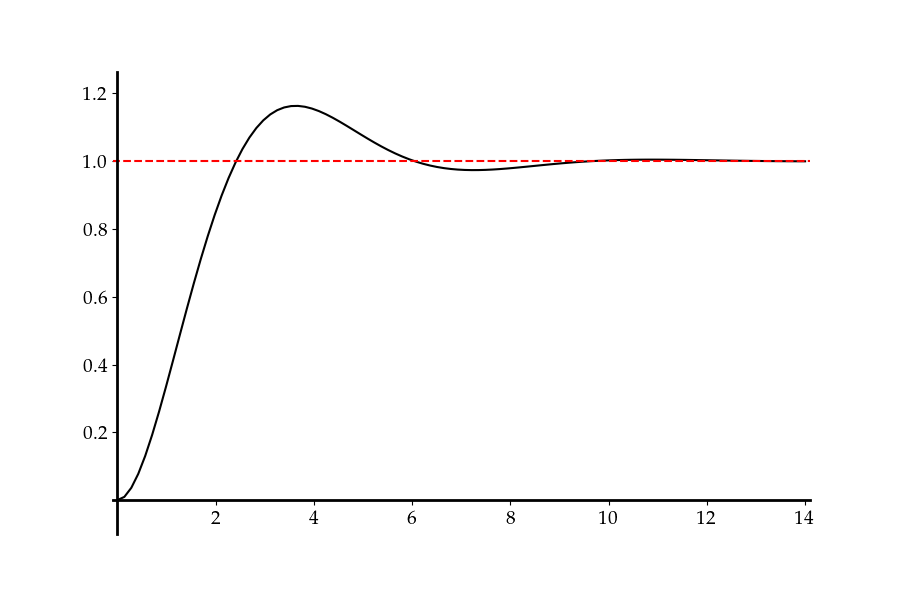

In [67]:
ax2 = graficar(y, t)

#ax2.plot(t, y, 'r')
ax2.plot([-1, 1000], [1, 1], "--r")
#ax2.plot([-1000, 1000], [ys2[2], ys2[2]], "--r")
#ax2.text(-0.35, 0.0 + ys2[1], r'$y_{i}$', color='red')
#ax2.text(-0.35, 0.0 + ys2[2], r'$y_{i+1}$', color='red');


#ax2.plot([ts2[1], ts2[1]], [-1000, 1000], "--r")
#ax2.plot([ts2[2], ts2[2]], [-1000, 1000], "--r")
#ax2.text(0.6, -0.1 , r'$x_{i}$', color='red')
#ax2.text(1.2, -0.1 , r'$x_{i+1}$', color='red');

<IPython.core.display.Javascript object>


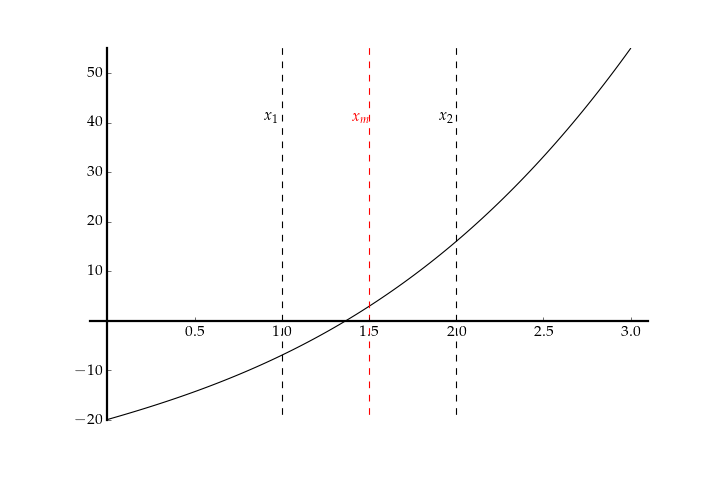

In [60]:
f = lambda x: x**3 + 2*x**2 + 10*x - 20

xs = linspace(0, 3, 100)
ys = f(xs)

ax1 = graficar(xs, ys)
ax1.plot([1, 1], [-1000, 1000], '--k')
ax1.plot([2, 2], [-1000, 1000], '--k')
ax1.plot([1.5, 1.5], [-1000, 1000], '--r')
ax1.text(0.9, 40, r'$x_1$')
ax1.text(1.9, 40, r'$x_2$')
ax1.text(1.4, 40, r'$x_m$', color='red')

In [29]:
tam=(6, 6)
tls=True

<IPython.core.display.Javascript object>


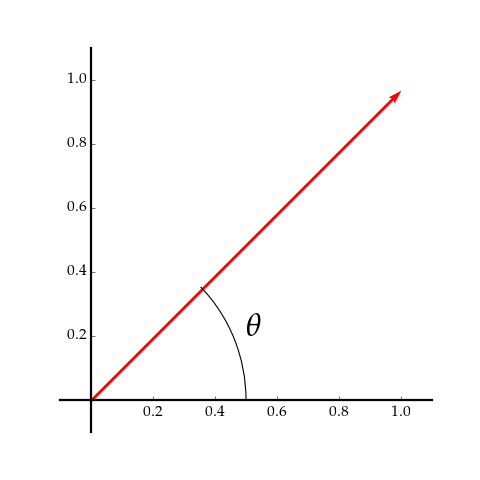

In [62]:
%matplotlib notebook
from matplotlib.pyplot import figure
from matplotlib import rc
from matplotlib.patches import Arc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino'], 'size':14.0})
#rc('font', **{'family':'cursive', 'cursive':['Zapf Chancery'], 'size':14.0})
#rc('font', **{'family':'fantasy', 'fantasy':['Humor Sans'], 'size':14.0})
rc('text', usetex=True)

fig = figure(figsize=tam)
ax = fig.gca()

#ax.axes.get_xaxis().set_visible(False)
#ax.axes.get_yaxis().set_visible(False)

ax.axes.spines["top"].set_color("none")
ax.axes.spines["right"].set_color("none")
ax.tick_params(top="off", right="off")

ax.axes.spines["left"].set_position("zero")
ax.axes.spines["bottom"].set_position("zero")
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)

#ax.plot(xs, ys, 'k')
ax.axes.set_xlim(-0.1, 1 + 0.1)
ax.axes.set_ylim(-0.1, 1 + 0.1)

elpse = Arc([0, 0], 1, 1, 0, 0, 45)
ax.add_patch(elpse)

ax.quiver([0], [0], [1], [1], scale=1.2, color="r");
#ax.quiver?

fig.canvas.draw()
if tls == False:
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])

labels = ax.xaxis.get_ticklabels()
#ticklabels[0].set_visible(False)
for label in labels:
    if label.get_text() == r'$0$' or label.get_text() == r'$0.0$':
        label.set_visible(False)

labels = ax.yaxis.get_ticklabels()
#ticklabels[0].set_visible(False)
for label in labels:
    if label.get_text() == r'$0$' or label.get_text() == r'$0.0$':
        label.set_visible(False)
        
ax.text(0.5, 0.2, r'$\theta$', size=30);

In [162]:
def ejes_vector(θ, p, eje):
    %matplotlib notebook
    from matplotlib.pyplot import figure
    from matplotlib import rc
    from matplotlib.patches import Arc

    from numpy import sin, cos, pi, matrix
    τ = 2*pi

    #θ = τ/18
    rot = matrix([[cos(θ), -sin(θ)],
                  [sin(θ), cos(θ)]])
    PA = matrix([p]).T
    PB = rot*PA
    
    if eje == "A":
        P = p
    else:
        P = PB.T.tolist()[0]
    
    print(P)
    
    δ = 0.1

    xa, ya = [1,0], [0,1]
    xb, yb = (rot*matrix([xa]).T).T.tolist()[0], (rot*matrix([ya]).T).T.tolist()[0]

    #rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    ## for Palatino and other serif fonts use:
    rc('font',**{'family':'serif','serif':['Palatino'], 'size':14.0})
    #rc('font', **{'family':'cursive', 'cursive':['Zapf Chancery'], 'size':14.0})
    #rc('font', **{'family':'fantasy', 'fantasy':['Humor Sans'], 'size':14.0})
    rc('text', usetex=True)

    tam=(6, 6)
    tls=True

    fig = figure(figsize=tam)
    ax = fig.gca()

    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    ax.axes.spines["top"].set_color("none")
    ax.axes.spines["bottom"].set_color("none")
    ax.axes.spines["left"].set_color("none")
    ax.axes.spines["right"].set_color("none")

    ax.axes.set_xlim(-8*δ, 1 + 4*δ)
    ax.axes.set_ylim(  -δ, 2 +   δ)

    ax.quiver([0], [0], [xa[0]], [xa[1]], scale=1, scale_units="xy", angles="xy", color="k")
    ax.quiver([0], [0], [ya[0]], [ya[1]], scale=1, scale_units="xy", angles="xy", color="k")
    ax.quiver([0], [0], [xb[0]], [xb[1]], scale=1, scale_units="xy", angles="xy", color="k")
    ax.quiver([0], [0], [yb[0]], [yb[1]], scale=1, scale_units="xy", angles="xy", color="k")
    ax.quiver([0], [0],  [P[0]],  [P[1]], scale=1, scale_units="xy", angles="xy", color="333", width=0.004)

    ax.text(xa[0] + δ, xa[1], r'$x_A$', size=15)        
    ax.text(ya[0] + δ, ya[1], r'$y_A$', size=15)        
    ax.text(xb[0] + δ, xb[1], r'$x_B$', size=15)        
    ax.text(yb[0] + δ, yb[1], r'$y_B$', size=15)        
    ax.text( P[0] + δ,  P[1],   r'$P$', size=15);

In [163]:
from numpy import pi
τ = 2*pi

[0, 2]


<IPython.core.display.Javascript object>


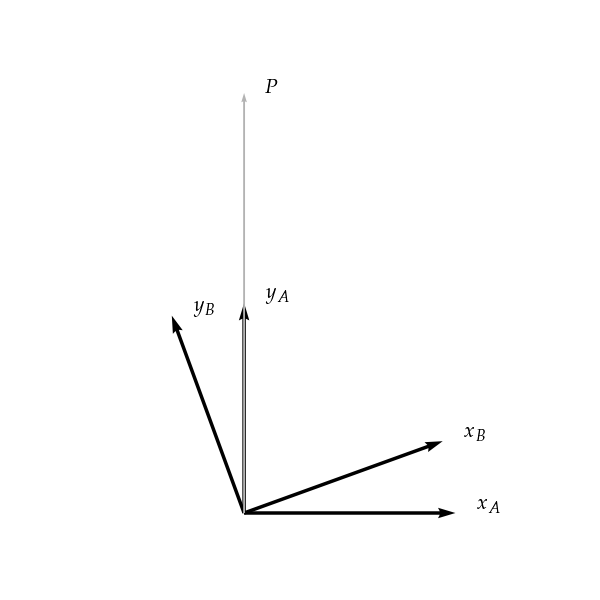

In [164]:
ejes_vector(τ/18, [0,2], "A")

[-0.6840402866513374, 1.8793852415718169]


<IPython.core.display.Javascript object>


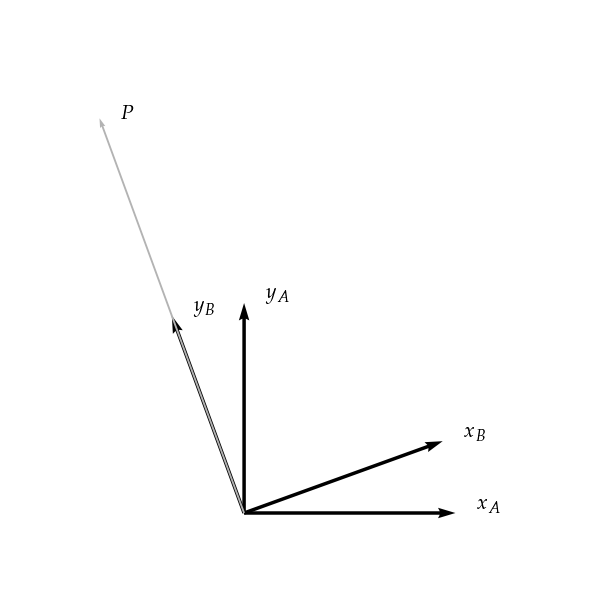

In [165]:
ejes_vector(τ/18, [0,2], "B")

In [166]:
2*cos(τ/6), 2*sin(τ/6)

(1.0000000000000002, 1.7320508075688772)

<IPython.core.display.Javascript object>


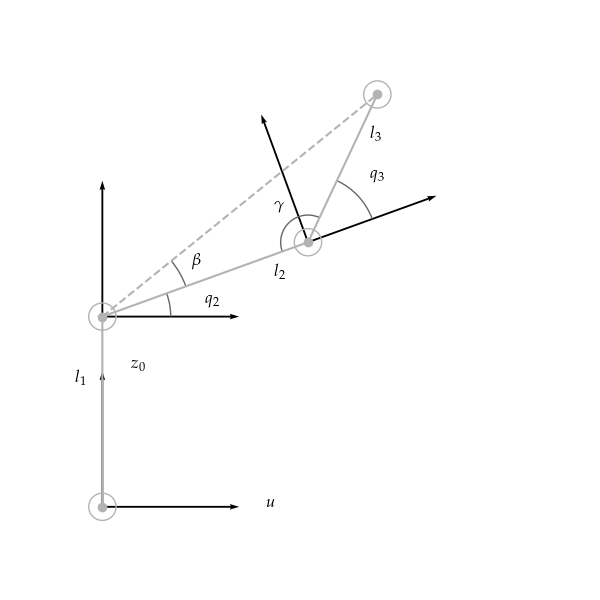

In [88]:
%matplotlib notebook
from matplotlib.pyplot import figure
from matplotlib import rc
from matplotlib.patches import Arc, Circle

from numpy import sin, cos, pi, matrix, array, eye, degrees, arctan2

def rot_z(θ):
    from numpy import sin, cos, matrix
    A = matrix([[cos(θ), -sin(θ), 0, 0],
                [sin(θ), cos(θ), 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]])
    return A

def tras_x(x):
    from numpy import matrix
    A = matrix([[1, 0, 0, x],
                [0, 1, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]])
    return A

def ejes(axis, origen, orientacion, long=0.5):
    
    i = orientacion[:3, :1].T.tolist()[0]
    j = orientacion[:3, 1:2].T.tolist()[0]
    k = orientacion[:3, 2:3].T.tolist()[0]    
    
    xs, ys, zs = origen.T.tolist()[0]
    us, vs, ws = zip(i)
    axis.quiver(xs, ys, us, vs, scale=2, scale_units="xy", angles="xy", color="k", width=0.004)

    us, vs, ws = zip(j)
    axis.quiver(xs, ys, us, vs, scale=2, scale_units="xy", angles="xy", color="k", width=0.004)

τ = 2*pi
δ = 0.1
l1, l2, l3 = 0.7, 0.8, 0.6
q1, q2, q3 = τ/4, -τ/4 + τ/18, τ/8

A1 = rot_z(q1)*tras_x(l1)
A2 = rot_z(q2)*tras_x(l2)
A3 = rot_z(q3)*tras_x(l3)

H1 = A1
H2 = A1*A2
H3 = A1*A2*A3

R1, R2, R3 = H1[:3, :3], H2[:3, :3], H3[:3, :3]
o1, o2, o3 = H1[:3, 3:], H2[:3, 3:], H3[:3, 3:]
x1, x2, x3 = H1[:3, :1], H2[:3, :1], H3[:3, :1]
y1, y2, y3 = H1[:3, 1:2], H2[:3, 1:2], H3[:3, 1:2]

o0 = matrix([[0, 0, 0]]).T
R0 = eye(3)

xs = [o0.item(0), o1.item(0), o2.item(0), o3.item(0)]
ys = [o0.item(1), o1.item(1), o2.item(1), o3.item(1)]

θ = arctan2(o3.item(1) - o1.item(1), o3.item(0) - o1.item(0))
γ = τ/2 - q3

p_l1 = o0 + (l1/2)*x1
p_l2 = o1 + (l2/2)*x2
p_l3 = o2 + (l3/2)*x3

p_q1 = o0 + (l1/2)*x1
p_q2 = o1 + (l2/2)*x2
p_q3 = o2 + (l3/2)*x3

#xa, ya = [1,0], [0,1]
#xb, yb = (rot*matrix([xa]).T).T.tolist()[0], (rot*matrix([ya]).T).T.tolist()[0]

#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino'], 'size':14.0})
#rc('font', **{'family':'cursive', 'cursive':['Zapf Chancery'], 'size':14.0})
#rc('font', **{'family':'fantasy', 'fantasy':['Humor Sans'], 'size':14.0})
rc('text', usetex=True)

tam=(6, 6)
tls=True

fig = figure(figsize=tam)
ax = fig.gca()

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.axes.spines["top"].set_color("none")
ax.axes.spines["bottom"].set_color("none")
ax.axes.spines["left"].set_color("none")
ax.axes.spines["right"].set_color("none")

ax.axes.set_xlim(-δ, 1.5 + δ)
ax.axes.set_ylim(-δ, 1.5 + δ)

eje0 = Circle([o0.item(0), o0.item(1)], 0.05, ec='333')
eje0.set_fill(False)
ax.add_patch(eje0)

eje1 = Circle([o1.item(0), o1.item(1)], 0.05, ec='333')
eje1.set_fill(False)
ax.add_patch(eje1)

eje2 = Circle([o2.item(0), o2.item(1)], 0.05, ec='333')
eje2.set_fill(False)
ax.add_patch(eje2)

eje3 = Circle([o3.item(0), o3.item(1)], 0.05, ec='333')
eje3.set_fill(False)
ax.add_patch(eje3)

#acot1 = Arc([o0.item(0), o0.item(1)], 0.5, 0.5, 0, 0, degrees(q1), color="666")
#ax.add_patch(acot1)

acot1 = Arc([o1.item(0), o1.item(1)], 0.5, 0.5, 0, degrees(0), degrees(q1 + q2), color="666")
ax.add_patch(acot1)

acot1 = Arc([o1.item(0), o1.item(1)], 0.65, 0.65, 0, degrees(q1 + q2), degrees(θ), color="666")
ax.add_patch(acot1)

acot1 = Arc([o2.item(0), o2.item(1)], 0.5, 0.5, 0, degrees(q1 + q2), degrees(q1 + q2 + q3), color="666")
ax.add_patch(acot1)

acot1 = Arc([o2.item(0), o2.item(1)], 0.2, 0.2, 0, degrees(q1 + q2 + q3), degrees(q1 + q2 + q3 + γ), color="666")
ax.add_patch(acot1)

ax.plot(xs, ys, "-o", color="333")
ax.plot([o1.item(0), o3.item(0)],[o1.item(1), o3.item(1)], "--", color="333")

ejes(ax, o0, R0)
ejes(ax, o1, R0)
ejes(ax, o2, R2)
#ejes(ax, o3, R3)

#ax.quiver([0], [0], [xa[0]], [xa[1]], scale=1, scale_units="xy", angles="xy", color="k")
#ax.quiver([0], [0], [ya[0]], [ya[1]], scale=1, scale_units="xy", angles="xy", color="k")
#ax.quiver([0], [0], [xb[0]], [xb[1]], scale=1, scale_units="xy", angles="xy", color="k")
#ax.quiver([0], [0], [yb[0]], [yb[1]], scale=1, scale_units="xy", angles="xy", color="k")
#ax.quiver([0], [0],  [P[0]],  [P[1]], scale=1, scale_units="xy", angles="xy", color="r", width=0.004)

ax.text(xs[0] + δ + 0.5, ys[0], r'$u$', size=12)        
ax.text(xs[0] + δ, ys[0] + 0.5, r'$z_0$', size=12)

#ax.text(xs[1] + (δ + 0.5)*x1.item(0), ys[1] + (δ + 0.5)*x1.item(1), r'$x_1$', size=12)        
#ax.text(xs[1] + (δ + 0.5)*y1.item(0), ys[1] + (δ + 0.5)*y1.item(1), r'$y_1$', size=12)

#ax.text(xs[2] + (δ + 0.5)*x2.item(0), ys[2] + (δ + 0.5)*x2.item(1), r'$x_2$', size=12)        
#ax.text(xs[2] + (δ + 0.4)*y2.item(0), ys[2] + (δ + 0.5)*y2.item(1), r'$y_2$', size=12)

#ax.text(xs[3] + (δ + 0.5)*x3.item(0), ys[3] + (δ + 0.5)*x3.item(1), r'$x_3$', size=12)        
#ax.text(xs[3] + (δ + 0.6)*y3.item(0), ys[3] + (δ + 0.5)*y3.item(1), r'$y_3$', size=12)

ax.text(p_l1.item(0) - δ,     p_l1.item(1) + δ, r'$l_1$', size=12)
ax.text(p_l2.item(0) + 2.5*δ,     p_l2.item(1) , r'$l_2$', size=12)
ax.text(p_l3.item(0) + δ, p_l3.item(1) + δ  , r'$l_3$', size=12)

#ax.text(p_l1.item(0) - δ, p_l1.item(1) - 1.25*δ, r'$q_1$', size=12)
ax.text(p_l2.item(0) + 0*δ, p_l2.item(1) - 1*δ, r'$q_2$', size=12)
ax.text(p_l3.item(0) + δ, p_l3.item(1) - 0.5*δ, r'$q_3$', size=12)
ax.text(p_l2.item(0) - 0.5*δ, p_l2.item(1) + 0.5*δ, r'$\beta$', size=12)
ax.text(p_l3.item(0) - 2.5*δ, p_l3.item(1) - 1.5*δ, r'$\gamma$', size=12)

fig.savefig('altura.png', transparent=True)

<IPython.core.display.Javascript object>


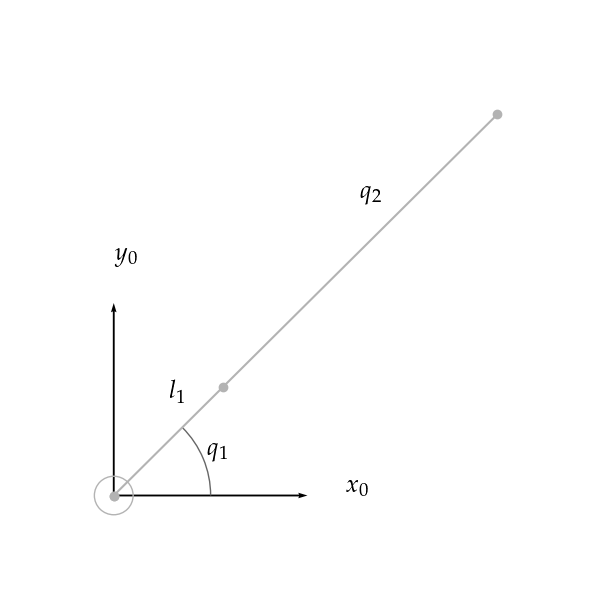

In [64]:
%matplotlib notebook
from matplotlib.pyplot import figure
from matplotlib import rc
from matplotlib.patches import Arc, Circle

from numpy import sin, cos, pi, matrix, array, eye, degrees

def rot_z(θ):
    from numpy import sin, cos, matrix
    A = matrix([[cos(θ), -sin(θ), 0, 0],
                [sin(θ), cos(θ), 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]])
    return A

def tras_x(x):
    from numpy import matrix
    A = matrix([[1, 0, 0, x],
                [0, 1, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]])
    return A

def ejes(axis, origen, orientacion, long=0.5):
    
    i = orientacion[:3, :1].T.tolist()[0]
    j = orientacion[:3, 1:2].T.tolist()[0]
    k = orientacion[:3, 2:3].T.tolist()[0]    
    
    xs, ys, zs = origen.T.tolist()[0]
    us, vs, ws = zip(i)
    axis.quiver(xs, ys, us, vs, scale=2, scale_units="xy", angles="xy", color="k", width=0.004)

    us, vs, ws = zip(j)
    axis.quiver(xs, ys, us, vs, scale=2, scale_units="xy", angles="xy", color="k", width=0.004)

τ = 2*pi
δ = 0.1
l1 = 0.4
q1, q2 = τ/8, 1

A1 = rot_z(q1)
A2 = tras_x(l1)
A3 = tras_x(q2)

H1 = A1
H2 = A1*A2
H3 = A1*A2*A3

R1, R2, R3 = H1[:3, :3], H2[:3, :3], H3[:3, :3]
o1, o2, o3 = H1[:3, 3:], H2[:3, 3:], H3[:3, 3:]
x1, x2, x3 = H1[:3, :1], H2[:3, :1], H3[:3, :1]
y1, y2, y3 = H1[:3, 1:2], H2[:3, 1:2], H3[:3, 1:2]

o0 = matrix([[0, 0, 0]]).T
R0 = eye(3)

xs = [o0.item(0), o1.item(0), o2.item(0), o3.item(0)]
ys = [o0.item(1), o1.item(1), o2.item(1), o3.item(1)]

p_l1 = o0 + (l1/2)*x1
#p_l2 = o1 + (l2/2)*x2
#p_l3 = o2 + (l3/2)*x3

p_q1 = o0 + (l1/2)*x1
p_q2 = o2 + (q2/2)*x3
#p_q3 = o2 + (l3/2)*x3

#xa, ya = [1,0], [0,1]
#xb, yb = (rot*matrix([xa]).T).T.tolist()[0], (rot*matrix([ya]).T).T.tolist()[0]

#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino'], 'size':14.0})
#rc('font', **{'family':'cursive', 'cursive':['Zapf Chancery'], 'size':14.0})
#rc('font', **{'family':'fantasy', 'fantasy':['Humor Sans'], 'size':14.0})
rc('text', usetex=True)

tam=(6, 6)
tls=True

fig = figure(figsize=tam)
ax = fig.gca()

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.axes.spines["top"].set_color("none")
ax.axes.spines["bottom"].set_color("none")
ax.axes.spines["left"].set_color("none")
ax.axes.spines["right"].set_color("none")

ax.axes.set_xlim(-δ, 1 + δ)
ax.axes.set_ylim(-δ, 1 + δ)

eje0 = Circle([o0.item(0), o0.item(1)], 0.05, ec='333')
eje0.set_fill(False)
ax.add_patch(eje0)

#eje1 = Circle([o1.item(0), o1.item(1)], 0.05, ec='333')
#eje1.set_fill(False)
#ax.add_patch(eje1)

#eje2 = Circle([o2.item(0), o2.item(1)], 0.05, ec='333')
#eje2.set_fill(False)
#ax.add_patch(eje2)

acot1 = Arc([o0.item(0), o0.item(1)], 0.5, 0.5, 0, 0, degrees(q1), color="666")
ax.add_patch(acot1)

#acot1 = Arc([o1.item(0), o1.item(1)], 0.5, 0.5, 0, degrees(q1), degrees(q1 + q2), color="666")
#ax.add_patch(acot1)

#acot1 = Arc([o2.item(0), o2.item(1)], 0.5, 0.5, 0, degrees(q1 + q2), degrees(q1 + q2 + q3), color="666")
#ax.add_patch(acot1)

ax.plot(xs, ys, "-o", color="333")

ejes(ax, o0, R0)
#ejes(ax, o1, R1)
#ejes(ax, o2, R2)
#ejes(ax, o3, R3)

#ax.quiver([0], [0], [xa[0]], [xa[1]], scale=1, scale_units="xy", angles="xy", color="k")
#ax.quiver([0], [0], [ya[0]], [ya[1]], scale=1, scale_units="xy", angles="xy", color="k")
#ax.quiver([0], [0], [xb[0]], [xb[1]], scale=1, scale_units="xy", angles="xy", color="k")
#ax.quiver([0], [0], [yb[0]], [yb[1]], scale=1, scale_units="xy", angles="xy", color="k")
#ax.quiver([0], [0],  [P[0]],  [P[1]], scale=1, scale_units="xy", angles="xy", color="r", width=0.004)

ax.text(xs[0] + δ + 0.5, ys[0], r'$x_0$', size=18)        
ax.text(xs[0] , ys[0] + 0.5 + δ, r'$y_0$', size=18)

#ax.text(xs[1] + (δ + 0.5)*x1.item(0), ys[1] + (δ + 0.5)*x1.item(1), r'$x_1$', size=12)        
#ax.text(xs[1] + (δ + 0.5)*y1.item(0), ys[1] + (δ + 0.5)*y1.item(1), r'$y_1$', size=12)

#ax.text(xs[2] + (δ + 0.5)*x2.item(0), ys[2] + (δ + 0.5)*x2.item(1), r'$x_2$', size=12)        
#ax.text(xs[2] + (δ + 0.4)*y2.item(0), ys[2] + (δ + 0.5)*y2.item(1), r'$y_2$', size=12)

#ax.text(xs[3] + (δ + 0.5)*x3.item(0), ys[3] + (δ + 0.5)*x3.item(1), r'$x_3$', size=12)      
#ax.text(xs[3] + (δ + 0.6)*y3.item(0), ys[3] + (δ + 0.5)*y3.item(1), r'$y_3$', size=12)

ax.text(p_l1.item(0),     p_l1.item(1) + δ, r'$l_1$', size=18)
#ax.text(p_l2.item(0),     p_l2.item(1) + δ, r'$l_2$', size=12)
#ax.text(p_l3.item(0) - δ, p_l3.item(1)    , r'$l_3$', size=12)

ax.text(p_q1.item(0) + δ, p_q1.item(1) - 0.5*δ, r'$q_1$', size=18)
ax.text(p_q2.item(0),     p_q2.item(1) + 1.25*δ, r'$q_2$', size=18)
#ax.text(p_l3.item(0) + δ, p_l3.item(1) + 0.50*δ, r'$q_3$', size=12);

<IPython.core.display.Javascript object>


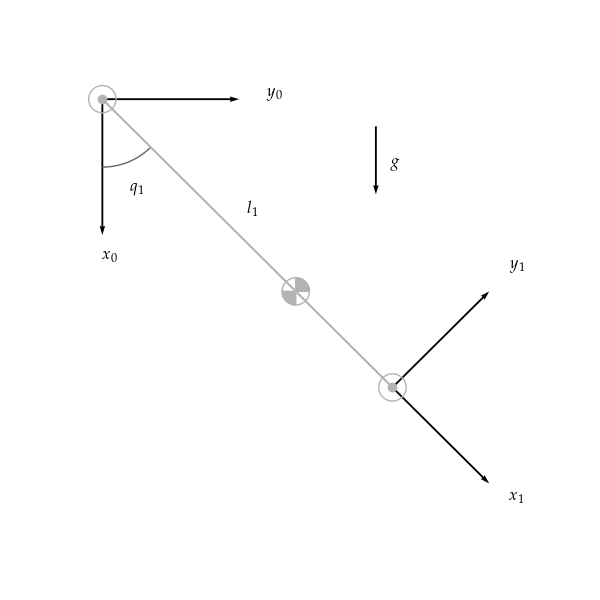

In [49]:
%matplotlib notebook
from matplotlib.pyplot import figure
from matplotlib import rc
from matplotlib.patches import Arc, Circle, Wedge

from numpy import sin, cos, pi, matrix, array, eye, degrees

def rot_z(θ):
    from numpy import sin, cos, matrix
    A = matrix([[cos(θ), -sin(θ), 0, 0],
                [sin(θ), cos(θ), 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]])
    return A

def tras_x(x):
    from numpy import matrix
    A = matrix([[1, 0, 0, x],
                [0, 1, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]])
    return A

def ejes(axis, origen, orientacion, long=0.5):
    
    i = orientacion[:3, :1].T.tolist()[0]
    j = orientacion[:3, 1:2].T.tolist()[0]
    k = orientacion[:3, 2:3].T.tolist()[0]    
    
    xs, ys, zs = origen.T.tolist()[0]
    us, vs, ws = zip(i)
    axis.quiver(xs, ys, us, vs, scale=2, scale_units="xy", angles="xy", color="k", width=0.004)

    us, vs, ws = zip(j)
    axis.quiver(xs, ys, us, vs, scale=2, scale_units="xy", angles="xy", color="k", width=0.004)

τ = 2*pi
δ = 0.1
l1 = 1
L1 = 1.5
q1 = -τ/8

A1 = rot_z(q1)*tras_x(L1)
Ac = rot_z(q1)*tras_x(l1)

Hc = Ac
H1 = A1

oc = Hc[:3, 3:]
xc = Hc[:3, :1]
yc = Hc[:3, 1:2]

R1 = H1[:3, :3]
o1 = H1[:3, 3:]
x1 = H1[:3, :1]
y1 = H1[:3, 1:2]

o0 = matrix([[0, 0, 0]]).T
R0 = rot_z(-τ/4)

xs = [o0.item(0), o1.item(0)]
ys = [o0.item(1), o1.item(1)]

p_l1 = o0 + (L1/2)*x1

rc('font',**{'family':'serif','serif':['Palatino'], 'size':14.0})
rc('text', usetex=True)

tam=(6, 6)
tls=True

fig = figure(figsize=tam)
ax = fig.gca()

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.axes.spines["top"].set_color("none")
ax.axes.spines["bottom"].set_color("none")
ax.axes.spines["left"].set_color("none")
ax.axes.spines["right"].set_color("none")

ax.axes.set_xlim(-δ, 1.5 + δ)
ax.axes.set_ylim(-1.5 - δ, δ)

eje0 = Circle([o0.item(0), o0.item(1)], 0.05, ec='333')
eje0.set_fill(False)
ax.add_patch(eje0)

eje1 = Circle([o1.item(0), o1.item(1)], 0.05, ec='333')
eje1.set_fill(False)
ax.add_patch(eje1)

wedge1 = Wedge([oc.item(0), oc.item(1)], 0.05, 0, 90, ec="333", fc="333")
ax.add_patch(wedge1)
wedge2 = Wedge([oc.item(0), oc.item(1)], 0.05, 180, 270, ec="333", fc="333")
ax.add_patch(wedge2)
eje2 = Circle([oc.item(0), oc.item(1)], 0.05, ec='333')
eje2.set_fill(False)
ax.add_patch(eje2)

acot1 = Arc([o0.item(0), o0.item(1)], 0.5, 0.5, 0, 270, degrees(q1), color="666")
ax.add_patch(acot1)

ax.plot(xs, ys, "-o", color="333")

ejes(ax, o0, R0)
ejes(ax, o1, R1)
ax.quiver([1], [-δ], [0], [-0.5], scale=2, scale_units="xy", angles="xy", color="k", width=0.004)

ax.text(xs[0], ys[0] - 0.5 - δ, r'$x_0$', size=12)        
ax.text(xs[0] + 0.5 + δ, ys[0], r'$y_0$', size=12)

ax.text(xs[1] + (δ + 0.5)*x1.item(0), ys[1] + (δ + 0.5)*x1.item(1), r'$x_1$', size=12)        
ax.text(xs[1] + (δ + 0.5)*y1.item(0), ys[1] + (δ + 0.5)*y1.item(1), r'$y_1$', size=12)

ax.text(1 + 0.5*δ, -0.25, r'$g$', size=12) 

ax.text(p_l1.item(0), p_l1.item(1) + δ, r'$l_1$', size=12)

ax.text(xs[0] + δ, xs[0] - 0.25- δ, r'$q_1$', size=12);